In [1]:
library(readr)
library(caret)
library(ranger)
library(glmnet)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



# Titanic

## Question 1

In [2]:
titanic = read.csv("C:/Users/student/Documents/train.csv")
titanic$PassengerId = NULL
titanic$Ticket = NULL
titanic$Name = NULL
titanic$Cabin = NULL
for(i in 1:ncol(titanic)) 
    {
    missval <- sum(is.na(titanic[i]))
    if(missval > 0)
      {
      if(is.numeric(titanic[[i]]) == FALSE) 
        {
        levels=unique(titanic[,i])
        titanic[,i][is.na(titanic[,i])]=levels[which.max(tabulate(match(titanic[,i], x = levels)))]
      }
      else
      {
        titanic[[i]][is.na(titanic[[i]])] <- mean(titanic[[i]], na.rm = TRUE)
      }
    }
}
titanic$Survived = factor(titanic$Survived)

## Question 2

In [3]:
Grid7Titanic = expand.grid(mtry = 2, splitrule = c("gini"), min.node.size = c(1:3))
model7Titanic = train(Survived~., titanic, method = "ranger", trControl = trainControl(method = "cv", number = 7, verboseIter = TRUE), tuneGrid = Grid7Titanic)

+ Fold1: mtry=2, splitrule=gini, min.node.size=1 
- Fold1: mtry=2, splitrule=gini, min.node.size=1 
+ Fold1: mtry=2, splitrule=gini, min.node.size=2 
- Fold1: mtry=2, splitrule=gini, min.node.size=2 
+ Fold1: mtry=2, splitrule=gini, min.node.size=3 
- Fold1: mtry=2, splitrule=gini, min.node.size=3 
+ Fold2: mtry=2, splitrule=gini, min.node.size=1 
- Fold2: mtry=2, splitrule=gini, min.node.size=1 
+ Fold2: mtry=2, splitrule=gini, min.node.size=2 
- Fold2: mtry=2, splitrule=gini, min.node.size=2 
+ Fold2: mtry=2, splitrule=gini, min.node.size=3 
- Fold2: mtry=2, splitrule=gini, min.node.size=3 
+ Fold3: mtry=2, splitrule=gini, min.node.size=1 
- Fold3: mtry=2, splitrule=gini, min.node.size=1 
+ Fold3: mtry=2, splitrule=gini, min.node.size=2 
- Fold3: mtry=2, splitrule=gini, min.node.size=2 
+ Fold3: mtry=2, splitrule=gini, min.node.size=3 
- Fold3: mtry=2, splitrule=gini, min.node.size=3 
+ Fold4: mtry=2, splitrule=gini, min.node.size=1 
- Fold4: mtry=2, splitrule=gini, min.node.size=1 


## Question 3

+ Fold01: mtry=2, splitrule=gini, min.node.size=1 
- Fold01: mtry=2, splitrule=gini, min.node.size=1 
+ Fold01: mtry=2, splitrule=gini, min.node.size=2 
- Fold01: mtry=2, splitrule=gini, min.node.size=2 
+ Fold01: mtry=2, splitrule=gini, min.node.size=3 
- Fold01: mtry=2, splitrule=gini, min.node.size=3 
+ Fold02: mtry=2, splitrule=gini, min.node.size=1 
- Fold02: mtry=2, splitrule=gini, min.node.size=1 
+ Fold02: mtry=2, splitrule=gini, min.node.size=2 
- Fold02: mtry=2, splitrule=gini, min.node.size=2 
+ Fold02: mtry=2, splitrule=gini, min.node.size=3 
- Fold02: mtry=2, splitrule=gini, min.node.size=3 
+ Fold03: mtry=2, splitrule=gini, min.node.size=1 
- Fold03: mtry=2, splitrule=gini, min.node.size=1 
+ Fold03: mtry=2, splitrule=gini, min.node.size=2 
- Fold03: mtry=2, splitrule=gini, min.node.size=2 
+ Fold03: mtry=2, splitrule=gini, min.node.size=3 
- Fold03: mtry=2, splitrule=gini, min.node.size=3 
+ Fold04: mtry=2, splitrule=gini, min.node.size=1 
- Fold04: mtry=2, splitrule=gin

Random Forest 

891 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 802, 802, 802, 802, 802, 801, ... 
Resampling results across tuning parameters:

  min.node.size  Accuracy   Kappa    
  1              0.8203206  0.6023644
  2              0.8203581  0.6019434
  3              0.8237291  0.6095222

Tuning parameter 'mtry' was held constant at a value of 2
Tuning
 parameter 'splitrule' was held constant at a value of gini
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 3.

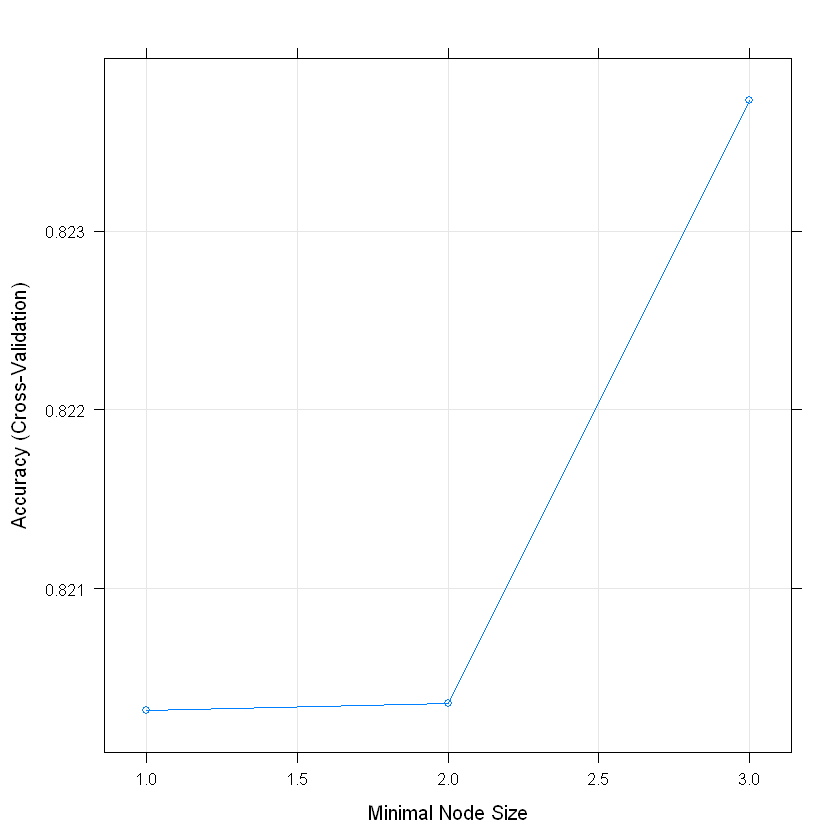

In [4]:
Grid10Titanic = expand.grid(mtry = 2, splitrule = c("gini"), min.node.size = c(1:3))
model10Titanic = train(Survived~., titanic, method = "ranger", trControl = trainControl(method = "cv", number = 10, verboseIter = TRUE), tuneGrid = Grid10Titanic)
plot(model10Titanic)
model10Titanic

## Question 4

In [5]:
#mtry = 2, splitrule = "gini", min.mode.size = 1 to 3

## Question 5

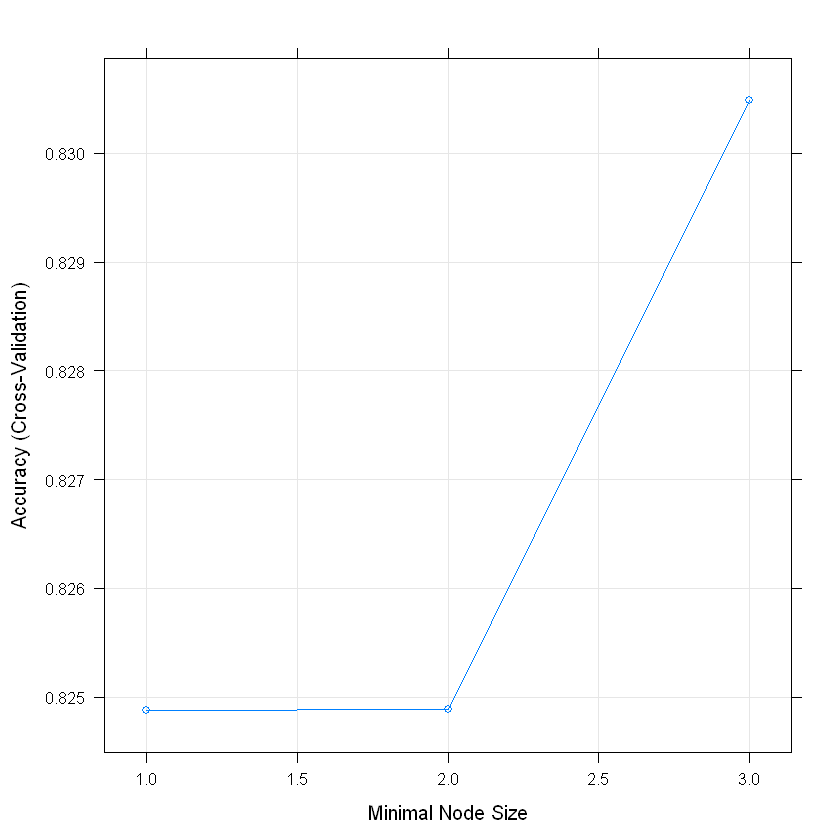

In [6]:
plot(model7Titanic)

## Question 6

In [7]:
myGridmax1 = expand.grid(mtry = c(1:(ncol(titanic)-1)), splitrule = c("gini", "extratrees"), min.node.size = c(1:5))
modelmax1 = train(Survived~., titanic, method = "ranger", trControl = trainControl(method = "cv", number = 7, verboseIter = FALSE), tuneGrid = myGridmax1)

## Question 7

Random Forest 

891 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 763, 764, 765, 764, 764, 763, ... 
Resampling results across tuning parameters:

  mtry  splitrule   min.node.size  Accuracy   Kappa    
  1     gini        1              0.7810875  0.4988571
  1     gini        2              0.7789261  0.4935210
  1     gini        3              0.7822391  0.5023712
  1     gini        4              0.7867651  0.5133806
  1     gini        5              0.7900781  0.5218340
  1     extratrees  1              0.7788558  0.4918018
  1     extratrees  2              0.7811320  0.4962742
  1     extratrees  3              0.7867478  0.5138046
  1     extratrees  4              0.7833288  0.5022364
  1     extratrees  5              0.7755077  0.4816699
  2     gini        1              0.8271640  0.6180524
  2     gini        2              0.8260215  0.6147243
  2     gini        3              0.8238248

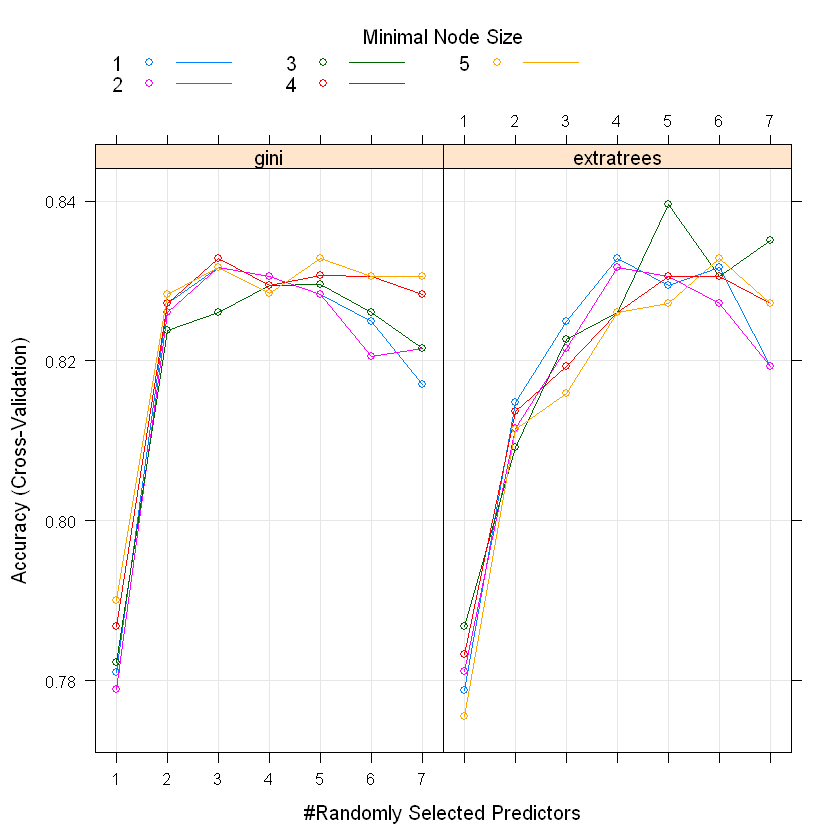

In [8]:
modelmax1
plot(modelmax1)

## Question 8

In [9]:
Gridglm1 = expand.grid(alpha = 0:1, lambda = seq(0.0001, 0.1, length = 10))
Control1 = trainControl(method = "cv", number = 7)
glmdef1 = train(Survived~., titanic, method = "glmnet")
glmtuned1 = train(Survived~., titanic, method ="glmnet",tuneGrid = Gridglm1, trControl = Control1)
max(glmtuned1$results$Accuracy) > max(glmdef1$results$Accuracy)
max(glmtuned1$results$Accuracy)
max(glmdef1$results$Accuracy)

[1] TRUE

[1] 0.8080855

[1] 0.7954433

# Adult

## Question 1

In [10]:
ad = read.csv("C:/Users/student/Desktop/Fall 2018/R Class/Datasets/adult.csv", header=FALSE, na.strings = c(" ?", "NA", "."))
names(ad) = c("Age", "WorkingClass", "FinalWeight", "Education", "Ed", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "Gains", "Losses", "AvgHrsWeek", "Country", "target")
for(i in 1:ncol(ad)) 
    {
    ad[ad ==" ?"]= NA  
    missval <- sum(is.na(ad[i]))
    if(missval > 0)
      {
      if(is.numeric(ad[[i]]) == FALSE) 
        {
        levels=unique(ad[,i])
        ad[,i][is.na(ad[,i])]=levels[which.max(tabulate(match(ad[,i], x = levels)))]
      }
      else
      {
        ad <- preProcess(ad, method='medianImpute')
      }
    }
}
levels(ad$Country) = c("A", "N", "A", "S", "I", "I", "S", "S", "E", "E", "E","E", "S", "I", "E", "S", "A", "E", "A", "A", "A", "E", "E", "I", "A", "A", "N", "S", "I", "S", "A", "E", "E", "I", "E", "I", "A", "A", "I", "N", "A", "E")
levels(ad$Education) = c("HS", "HS", "HS", "ES", "ES", "ES", "HS", "A", "A", "U", "G", "HS", "G", "ES", "U", "A")
levels(ad$Occupation) = c("A", "A", "A", "B", "B", "B", "C", "C", "C", "D", "D", "D", "E", "E")

## Question 2

In [11]:
Grid7ad = expand.grid(mtry = 2, splitrule = c("gini"), min.node.size = c(1:3))
model7ad = train(target~., ad, method = "ranger", trControl = trainControl(method = "cv", number = 7, verboseIter = TRUE), tuneGrid = Grid7ad)
model7ad

+ Fold1: mtry=2, splitrule=gini, min.node.size=1 
- Fold1: mtry=2, splitrule=gini, min.node.size=1 
+ Fold1: mtry=2, splitrule=gini, min.node.size=2 
- Fold1: mtry=2, splitrule=gini, min.node.size=2 
+ Fold1: mtry=2, splitrule=gini, min.node.size=3 
- Fold1: mtry=2, splitrule=gini, min.node.size=3 
+ Fold2: mtry=2, splitrule=gini, min.node.size=1 
- Fold2: mtry=2, splitrule=gini, min.node.size=1 
+ Fold2: mtry=2, splitrule=gini, min.node.size=2 
- Fold2: mtry=2, splitrule=gini, min.node.size=2 
+ Fold2: mtry=2, splitrule=gini, min.node.size=3 
- Fold2: mtry=2, splitrule=gini, min.node.size=3 
+ Fold3: mtry=2, splitrule=gini, min.node.size=1 
- Fold3: mtry=2, splitrule=gini, min.node.size=1 
+ Fold3: mtry=2, splitrule=gini, min.node.size=2 
- Fold3: mtry=2, splitrule=gini, min.node.size=2 
+ Fold3: mtry=2, splitrule=gini, min.node.size=3 
- Fold3: mtry=2, splitrule=gini, min.node.size=3 
+ Fold4: mtry=2, splitrule=gini, min.node.size=1 
- Fold4: mtry=2, splitrule=gini, min.node.size=1 


Random Forest 

32561 samples
   14 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (7 fold) 
Summary of sample sizes: 27909, 27910, 27908, 27909, 27910, 27910, ... 
Resampling results across tuning parameters:

  min.node.size  Accuracy   Kappa    
  1              0.8360305  0.4681915
  2              0.8361840  0.4686920
  3              0.8360921  0.4679834

Tuning parameter 'mtry' was held constant at a value of 2
Tuning
 parameter 'splitrule' was held constant at a value of gini
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 2.

## Question 3

In [ ]:
Grid10ad = expand.grid(mtry = 2, splitrule = c("gini"), min.node.size = c(1:3))
model10ad = train(target~., ad, method = "ranger", trControl = trainControl(method = "cv", number = 10, verboseIter = TRUE), tuneGrid = Grid10ad)
plot(model10ad)
model10ad

## Question 4

In [ ]:
#mtry = 2, splitrule = "gini", min.mode.size = 1 to 3

## Question 5

In [ ]:
plot(model7ad)

## Question 6

In [ ]:
#Gridmaxad = expand.grid(mtry = c(1:(ncol(ad)-1)), splitrule = c("gini", "extratrees"), min.node.size = c(1:20))
#modelmaxad = train(target~., ad, method = "ranger", trControl = trainControl(method = "cv", number = 7, verboseIter = TRUE), tuneGrid = Gridmaxad)
#Takes a very long time to run.

## Question 7

In [ ]:
#modelmaxad
#plot(modelmaxad)

## Question 8

In [ ]:
Gridglm = expand.grid(alpha = 0:1, lambda = seq(0.0001, 0.1, length = 10))
Control = trainControl(method = "cv", number = 7)
glmdefa = train(target~., ad, method = "glmnet")
glmtuneda = train(target~., ad, method ="glmnet",tuneGrid = Gridglm, trControl = Control)
max(glmtuneda$results$Accuracy) > max(glmdefa$results$Accuracy)
max(glmtuneda$results$Accuracy)
max(glmdefa$results$Accuracy)